In [ ]:
import glob
import os
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer
import numpy as np

In [ ]:
import nltk
nltk.download('names')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
!unzip "/content/archive (35).zip"

Archive:  /content/archive (35).zip
replace ham/0001.ea7e79d3153e7469e7a9c3e0af6a357e? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
file_path = "/content/ham/0001.ea7e79d3153e7469e7a9c3e0af6a357e"
with open(file_path, 'r') as infile:
    ham_example = infile.read()
print(ham_example)

From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002
Return-Path: <exmh-workers-admin@example.com>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36
	for <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)
Received: from listman.example.com (listman.example.com [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for
    <zzzz-exmh@example.com>; Thu, 22 Aug 2002 12:34:53 +0100
Received: from listman.example.com (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002
    07:35:02 -0400 (EDT)
Delivered-To: exmh-workers@listman.example.com
Received: from int-mx1.corp.example.com (int-mx1.corp.example.com
    [172.16.52.254]) by lis

In [ ]:
file_path = '/content/spam/0025.97302502dc8e20ab7e7eb05f926e1bab'
with open(file_path, 'r') as infile:
    spam_example = infile.read()
print(spam_example)

From iq@insurancemail.net  Fri Aug 23 11:17:41 2002
Return-Path: <iq@insurancemail.net>
Delivered-To: zzzz@localhost.example.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.example.com (Postfix) with ESMTP id 24BEC47CC8
	for <zzzz@localhost>; Fri, 23 Aug 2002 06:12:01 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Fri, 23 Aug 2002 11:12:01 +0100 (IST)
Received: from mail1.insuranceiq.com (host66.insuranceiq.com
    [65.217.159.66] (may be forged)) by dogma.slashnull.org (8.11.6/8.11.6)
    with ESMTP id g7MMxgZ28549 for <zzzz@jmason.org>; Thu, 22 Aug 2002 23:59:42
    +0100
Received: from mail pickup service by mail1.insuranceiq.com with Microsoft
    SMTPSVC; Thu, 22 Aug 2002 19:00:32 -0400
Subject: Save 84% on CE Credits
To: <zzzz@jmason.org>
Date: Thu, 22 Aug 2002 19:00:32 -0400
From: "IQ Campus" <iq@insurancemail.net>
Message-Id: <34327d01c24a2f$b797ea60$6b01a8c0@insuranceiq.com>
X-Mail

In [ ]:
#LOADING SPAM EMAILS
emails, labels = [], []
file_path = '/content/spam'
for filename in os.listdir(file_path):
    f = os.path.join(file_path, filename)
    if os.path.isfile(f):
        with open(f, 'r', encoding = "ISO-8859-1") as infile:
            emails.append(infile.read())
            labels.append(1)

In [ ]:
#LOADING NON-SPAM EMAILS
file_path = '/content/ham'
for filename in os.listdir(file_path):
    f = os.path.join(file_path, filename)
    if os.path.isfile(f):
        with open(f, 'r', encoding = "ISO-8859-1") as infile:
            emails.append(infile.read())
            labels.append(0)

In [ ]:
len(labels), len(emails)

(3052, 3052)

In [ ]:
def letters_only(astr):
    return astr.isalpha()
all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

In [ ]:
def clean_text(docs):
    cleaned_docs = []
    for doc in docs:
        cleaned_docs.append(' '.join([lemmatizer.lemmatize(word.lower())
        for word in doc.split()
            if letters_only(word) and word not in all_names]))
    return cleaned_docs
cleaned_emails = clean_text(emails)
cleaned_emails[0]

'from fri aug from localhost by with esmtp id for aug from phobos by localhost with imap for aug from by with esmtp id for aug from lugh by with esmtp id aug from by with esmtp id for aug host claimed to be aug microsoft outlook express enter chinese market bulk irish linux group dear sir or please reply to china enterprise management a one technical organization supported by china investment and technical promotion office of united nation industry development organization we cooperate closely with the relevant chinese quality supervision and standardization information we provide the most valuable consulting service to help you to open chinese market within the shortest consulting service on mandatory national standard of the republic of consulting service on inspection and quarantine standard of the republic of consulting service for permission to enter chinese market we are very sorry to disturb more please check our world wide sincerely yours irish linux for list'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words="english", max_features=500)

In [ ]:
term_docs = cv.fit_transform(cleaned_emails)
print(term_docs [0])

  (0, 139)	1
  (0, 21)	7
  (0, 236)	2
  (0, 111)	4
  (0, 180)	4
  (0, 307)	1
  (0, 183)	1
  (0, 244)	1
  (0, 176)	1
  (0, 55)	1
  (0, 264)	1
  (0, 296)	1
  (0, 117)	1
  (0, 254)	3
  (0, 39)	1
  (0, 203)	2
  (0, 230)	2
  (0, 156)	1
  (0, 355)	1
  (0, 109)	1
  (0, 252)	1
  (0, 201)	1
  (0, 288)	1
  (0, 460)	1
  (0, 275)	1
  (0, 190)	1
  (0, 86)	1
  (0, 192)	1
  (0, 335)	1
  (0, 396)	4
  (0, 171)	1
  (0, 291)	1
  (0, 276)	1
  (0, 418)	2
  (0, 53)	1
  (0, 494)	1
  (0, 231)	1


In [ ]:
feature_names = cv.get_feature_names()
feature_names[139], feature_names[21], feature_names[236]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


('fri', 'aug', 'localhost')

In [ ]:
feature_mapping = cv.vocabulary_

In [ ]:
from collections import defaultdict
def get_label_index(labels):
  label_index = defaultdict(list)
  for index, label in enumerate(labels):
    label_index[label].append(index)
  return label_index
label_index = get_label_index(labels)

In [ ]:
def get_prior(label_index):
  prior = {label: len(index) for label, index in label_index.items()}
  total_count = sum(prior.values())
  for label in prior:
    prior[label] /= float(total_count)
  return prior
prior = get_prior(label_index)

In [ ]:
label_index

defaultdict(list,
            {0: [501,
              502,
              503,
              504,
              505,
              506,
              507,
              508,
              509,
              510,
              511,
              512,
              513,
              514,
              515,
              516,
              517,
              518,
              519,
              520,
              521,
              522,
              523,
              524,
              525,
              526,
              527,
              528,
              529,
              530,
              531,
              532,
              533,
              534,
              535,
              536,
              537,
              538,
              539,
              540,
              541,
              542,
              543,
              544,
              545,
              546,
              547,
              548,
              549,
              550,
              551,
          

In [ ]:
prior

{0: 0.8358453473132372, 1: 0.16415465268676277}

In [ ]:
def get_likelihood(term_document_matrix, label_index, smoothing=0):
  likelihood = {}
  for label, index in label_index.items():
    likelihood[label] = term_document_matrix[index, :].sum(axis=0) + smoothing
    likelihood[label] = np.asarray(likelihood[label])[0]
    total_count = likelihood[label].sum()
    likelihood[label] = likelihood[label] / float(total_count)
  return likelihood

In [ ]:
smoothing = 1
likelihood = get_likelihood(term_docs, label_index, smoothing)
len(likelihood[0])
likelihood[0]

array([6.34937609e-04, 1.07605216e-03, 9.42381083e-04, 4.01013227e-04,
       7.35190916e-04, 1.63747068e-03, 2.80709259e-04, 1.32334365e-03,
       7.55241577e-04, 1.17630547e-03, 4.21063888e-04, 6.41621163e-04,
       8.95596206e-04, 6.08203394e-04, 1.61073646e-03, 1.02258373e-03,
       7.68608685e-04, 7.81975792e-04, 7.08456701e-04, 7.01773147e-04,
       6.48304717e-04, 3.45873908e-02, 6.95089593e-04, 5.94836286e-04,
       9.29013975e-04, 4.21063888e-04, 9.75798852e-04, 6.28254055e-04,
       7.21823808e-04, 4.54481657e-04, 1.66420489e-03, 1.70430621e-03,
       1.30329299e-03, 1.12283703e-03, 7.68608685e-04, 5.74785625e-04,
       5.41367856e-04, 2.51969977e-03, 7.75292238e-04, 1.11214335e-02,
       1.45701472e-03, 1.58400225e-03, 4.87899426e-04, 1.06268505e-03,
       7.28507362e-04, 8.75545545e-04, 4.27747442e-04, 1.31666009e-03,
       1.53721737e-04, 6.34937609e-04, 1.04263439e-03, 7.15140254e-04,
       2.51969977e-03, 1.37012852e-03, 5.41367856e-04, 5.61418517e-04,
      

In [ ]:
feature_names[:5]

['ability', 'able', 'access', 'account', 'act']

In [ ]:
def get_posterior(term_document_matrix, prior, likelihood):
  num_docs = term_document_matrix.shape[0]
  posteriors = []
  for i in range(num_docs):
    posterior = {key: np.log(prior_label) for key, prior_label in prior.items()}
    for label, likelihood_label in likelihood.items():
      term_document_vector = term_document_matrix.getrow(i)
      counts = term_document_vector.data
    indices = term_document_vector.indices
    for count, index in zip(counts, indices):
      posterior[label] += np.log(likelihood_label[index]) * count
    min_log_posterior = min(posterior.values())
    for label in posterior:
      try:
        posterior[label] = np.exp(posterior[label] - min_log_posterior)
      except:
        posterior[label] = float('inf')
    sum_posterior = sum(posterior.values())
    for label in posterior:
      if posterior[label] == float('inf'):
        posterior[label] = 1.0
      else:
        posterior[label] /= sum_posterior
    posteriors.append(posterior.copy())
  return posteriors

In [ ]:
nonspam_test = ['Dear Mr Mitchell, I am writing in reference to the current situation with the Skipton Airport Project. We have a number of questions which we hope you could answer. First of all, could you please provide us with an update on where you are on the Skipton Airport Project. We would also appreciate it if you could clarify what the current issues with the delivery system are, and confirm when you expect them to be resolved.In addition, at the end of our last meeting we requested a copy of the latest project update report. Unfortunately, we have still not received it. We would appreciate it if you could forward this to us. Could you also please confirm whether the post-installation support covers the equipment 24 hours a day? And what is actually included in the support? In particular, we would like to have confirmation if the cost of parts and labour are included in the package? We require this information as soon as possible. And lastly, we are considering extending the period of the post-installation support from your company from 6 months to 12 months. We would be very grateful if you could provide us with a quote for this extension. I would really appreciate it if you could deal with these matters urgently. I look forward to hearing from you. Yours sincerely, Ian McAdam Development Manager']

In [ ]:
cleaned_test = clean_text(nonspam_test)
term_docs_test = cv.transform(cleaned_test)
posterior = get_posterior(term_docs_test, prior, likelihood)
print(posterior)

[{1: 1.0, 0: 7.787168415308646e-80}]


In [ ]:
spam_test=['kevin moore, Subject: having problems in bed ? we can help ! cialis allows men to enjoy a fully normal sex life without having to plan the sexual act .  if we let things terrify us, life will not be worth living brevity is the soul of lingerie . suspicion always haunts the guilty mind .']

In [ ]:
cleaned_test = clean_text(spam_test)
term_docs_test = cv.transform(cleaned_test)
posterior = get_posterior(term_docs_test, prior, likelihood)
print(posterior)

[{1: 1.0, 0: 5.241743034291877e-41}]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(cleaned_emails, labels, test_size=0.33, random_state=42)

In [ ]:
len(X_train), len(Y_train)

(2044, 2044)

In [ ]:
len(X_test), len(Y_test)

(1008, 1008)

In [ ]:
term_docs_train = cv.fit_transform(X_train)
label_index = get_label_index(Y_train)
prior = get_prior(label_index)
likelihood = get_likelihood(term_docs_train, label_index, smoothing)

In [ ]:
term_docs_test = cv.transform(X_test)
posterior = get_posterior(term_docs_test, prior, likelihood)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


In [ ]:
correct = 0.0
for pred, actual in zip(posterior, Y_test):
  if actual == 1:
    if pred[1] >= 0.5:
      correct += 1
  elif pred[0] > 0.5:
    correct += 1
print('The accuracy on {0} testing samples is: {1:.1f}%'.format(len(Y_test), correct/len(Y_test)*100))

The accuracy on 1008 testing samples is: 82.5%


In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=1.0, fit_prior=True)
clf.fit(term_docs_train, Y_train)
prediction_prob = clf.predict_proba(term_docs_test)
prediction_prob[0:10]

array([[9.73955941e-01, 2.60440593e-02],
       [1.00000000e+00, 1.22136766e-18],
       [1.00000000e+00, 2.16478365e-12],
       [1.00000000e+00, 1.50305223e-45],
       [1.00000000e+00, 1.57702044e-15],
       [9.49822401e-09, 9.99999991e-01],
       [1.00000000e+00, 1.36601479e-19],
       [1.00000000e+00, 3.46376049e-17],
       [4.81643685e-22, 1.00000000e+00],
       [1.00000000e+00, 1.76813517e-19]])

In [ ]:
prediction = clf.predict(term_docs_test)
prediction[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
accuracy = clf.score(term_docs_test, Y_test)
print('The accuracy using MultinomialNB is: {0:.1f}%'.format(accuracy*100))

The accuracy using MultinomialNB is: 94.4%


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, prediction, labels=[0, 1])

array([[824,   8],
       [ 48, 128]])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(Y_test, prediction, pos_label=1), recall_score(Y_test, prediction, pos_label=1), f1_score(Y_test, prediction, pos_label=1)

(0.9411764705882353, 0.7272727272727273, 0.8205128205128205)

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, prediction)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       832
           1       0.94      0.73      0.82       176

    accuracy                           0.94      1008
   macro avg       0.94      0.86      0.89      1008
weighted avg       0.94      0.94      0.94      1008



In [ ]:
pos_prob = prediction_prob[:, 1]
thresholds = np.arange(0.0, 1.2, 0.1)
true_pos, false_pos = [0]*len(thresholds), [0]*len(thresholds)
for pred, y in zip(pos_prob, Y_test):
  for i, threshold in enumerate(thresholds):
    if pred >= threshold:
      if y == 1:
        true_pos[i] += 1
      else:
        false_pos[i] += 1
    else:
      break

In [ ]:
true_pos_rate = [tp / 176.0 for tp in true_pos]
false_pos_rate = [fp / 832.0 for fp in false_pos]

No handles with labels found to put in legend.


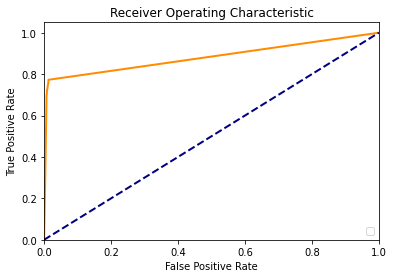

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(false_pos_rate, true_pos_rate, color='darkorange', lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, pos_prob)

0.9844876802884616

In [ ]:
from sklearn.model_selection import StratifiedKFold
k = 10
k_fold = StratifiedKFold(n_splits=k)
cleaned_emails_np = np.array(cleaned_emails)
labels_np = np.array(labels)
max_features_option = [2000, 4000, 8000]
smoothing_factor_option = [0.5, 1.0, 1.5, 2.0]
fit_prior_option = [True, False]
auc_record = {}

In [ ]:
for train_indices, test_indices in k_fold.split(cleaned_emails, labels):
  X_train, X_test = cleaned_emails_np[train_indices], cleaned_emails_np[test_indices]
  Y_train, Y_test = labels_np[train_indices], labels_np[test_indices]
  for max_features in max_features_option:
    if max_features not in auc_record:
      auc_record[max_features] = {}
    cv = CountVectorizer(stop_words="english", max_features=max_features)
    term_docs_train = cv.fit_transform(X_train)
    term_docs_test = cv.transform(X_test)
    for smoothing in smoothing_factor_option:
      if smoothing not in auc_record[max_features]:
        auc_record[max_features][smoothing] = {}
      for fit_prior in fit_prior_option:
        clf = MultinomialNB(alpha=smoothing, fit_prior=fit_prior)
        clf.fit(term_docs_train, Y_train)
        prediction_prob = clf.predict_proba(term_docs_test)
        pos_prob = prediction_prob[:, 1]
        auc = roc_auc_score(Y_test, pos_prob)
        auc_record[max_features][smoothing][fit_prior] = auc + auc_record[max_features][smoothing].get(fit_prior, 0.0)

In [ ]:
print('max features smoothing fit prior auc'.format(max_features, smoothing, fit_prior, auc/k))
for max_features, max_feature_record in auc_record.items():
  for smoothing, smoothing_record in max_feature_record.items():
    for fit_prior, auc in smoothing_record.items():
      print(' {0} {1} {2} {3:.4f}'.format(max_features, smoothing, fit_prior, auc/k))

max features smoothing fit prior auc
 2000 0.5 True 0.9896
 2000 0.5 False 0.9896
 2000 1.0 True 0.9897
 2000 1.0 False 0.9897
 2000 1.5 True 0.9899
 2000 1.5 False 0.9899
 2000 2.0 True 0.9900
 2000 2.0 False 0.9900
 4000 0.5 True 0.9904
 4000 0.5 False 0.9904
 4000 1.0 True 0.9904
 4000 1.0 False 0.9904
 4000 1.5 True 0.9906
 4000 1.5 False 0.9906
 4000 2.0 True 0.9920
 4000 2.0 False 0.9921
 8000 0.5 True 0.9913
 8000 0.5 False 0.9913
 8000 1.0 True 0.9918
 8000 1.0 False 0.9918
 8000 1.5 True 0.9923
 8000 1.5 False 0.9923
 8000 2.0 True 0.9921
 8000 2.0 False 0.9921
